In [1]:
# Import pandas
import pandas as pd

In [2]:
# Loading csv files using pandas.read_csv() method
df = pd.read_csv("events_data.csv")

In [3]:
# Display first 5 rows
df.head()

event_id     device_id            timestamp  longitude   latitude  \
0   2765368  2.973348e+18  2016-05-07 22:52:05  77.225676  28.730140   
1   2955066  4.734221e+18  2016-05-01 20:44:16  88.388361  22.660325   
2    605968 -3.264500e+18  2016-05-02 14:23:04  77.256809  28.757906   
3    448114  5.731369e+18  2016-05-03 13:21:16  80.343613  13.153332   
4    665740  3.388880e+17  2016-05-06 03:51:05  85.997745  23.842609   

       city       state  
0     Delhi       Delhi  
1  Calcutta  WestBengal  
2     Delhi       Delhi  
3   Chennai   TamilNadu  
4    Bokaro   Jharkhand

In [4]:
# Descriptive information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [5]:
# Check for missing values
df.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

In [6]:
df.nunique()

event_id     3252950
device_id      60865
timestamp     588126
longitude      60095
latitude       60177
city             933
state             32
dtype: int64

## **Handle missing values in state**

In [7]:
bool_series1 = pd.isnull(df["state"]) 
    
# filtering data 
# displaying data only with state = NaN 
df_null_state = df[bool_series1]
df_null_state.head()

event_id     device_id            timestamp  longitude   latitude  \
2931     706554 -5.829328e+18  2016-05-05 16:58:46  73.851671  18.593313   
16243   1918653  3.137054e+18  2016-05-03 00:46:10  83.326714  17.829748   
26956   1068940 -1.752057e+18  2016-05-04 16:09:17  75.930969  22.818845   
30889   2164200 -3.945827e+17  2016-05-04 19:33:09  83.366564  17.757190   
32685    460124  5.536513e+18  2016-05-01 21:30:10  80.359796  13.128174   

                city state  
2931            Pune   NaN  
16243  Visakhapatnam   NaN  
26956         Indore   NaN  
30889  Visakhapatnam   NaN  
32685        Chennai   NaN

In [8]:
df_null_state.groupby(['city']).nunique()

event_id  device_id  timestamp  longitude  latitude  state
city                                                                     
Arambagh             16          1         16          1         1      0
Channapatna          14          1         14          1         1      0
Chennai              47          3         47          3         3      0
Delhi                64          3         64          3         3      0
Gangarampur          26          1         26          1         1      0
Indore               51          3         51          3         3      0
Jaipur               49          3         49          3         3      0
Pune                 63          3         63          3         3      0
Visakhapatnam        47          3         47          3         3      0

In [9]:
# Create a mapping of city to state using the non-null values
city_to_state_map = df.dropna(subset=['state']).set_index('city')['state'].to_dict()

# Function to fill missing state values based on the city
def fill_state_based_on_city(row):
    if pd.isnull(row['state']):
        return city_to_state_map.get(row['city'])
    return row['state']

# Apply the function to fill missing state values
df['state'] = df.apply(fill_state_based_on_city, axis=1)

df.isnull().sum()
#print(df)

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state          0
dtype: int64

#### This code will fill the missing values in the 'state' column based on the corresponding values in the 'city' column. If a city in the 'city' column has a valid state value, it will use that value to fill in the missing 'state' values for the same city.

## **Handle missing values in longitude and latitude**

In [10]:
bool_series = pd.isnull(df["longitude"]) 
    
# filtering data 
# displaying data only with longitude = NaN 
df[bool_series].head()

event_id     device_id            timestamp  longitude  latitude  \
8015    2929521  1.779631e+18  2016-05-05 01:15:22        NaN       NaN   
9697    1017749 -8.790560e+18  2016-05-03 17:22:52        NaN       NaN   
10949   2132415  4.865607e+18  2016-05-07 19:57:06        NaN       NaN   
16038    926804  7.983871e+18  2016-05-03 12:29:47        NaN       NaN   
20586   3074782 -7.364841e+18  2016-05-04 19:39:28        NaN       NaN   

                city          state  
8015           Delhi          Delhi  
9697          Indore  MadhyaPradesh  
10949  Visakhapatnam  AndhraPradesh  
16038        Chennai      TamilNadu  
20586           Pune    Maharashtra

In [11]:
# Create a mapping of device_id to longitude using the non-null values
device_id_to_longitude_map = df.dropna(subset=['longitude']).set_index('device_id')['longitude'].to_dict()

# Function to fill missing longitude values based on the device_id
def fill_longitude_based_on_device_id(row):
    if pd.isnull(row['longitude']):
        return device_id_to_longitude_map.get(row['device_id'])
    return row['longitude']

# Apply the function to fill missing state values
df['longitude'] = df.apply(fill_longitude_based_on_device_id, axis=1)

df.isnull().sum()
#print(df)

event_id       0
device_id    453
timestamp      0
longitude      0
latitude     423
city           0
state          0
dtype: int64

In [12]:
# Create a mapping of device_id to latitude using the non-null values
device_id_to_latitude_map = df.dropna(subset=['latitude']).set_index('device_id')['latitude'].to_dict()

# Function to fill missing latitude values based on the device_id
def fill_latitude_based_on_device_id(row):
    if pd.isnull(row['latitude']):
        return device_id_to_latitude_map.get(row['device_id'])
    return row['latitude']

# Apply the function to fill missing state values
df['latitude'] = df.apply(fill_latitude_based_on_device_id, axis=1)

df.isnull().sum()
#print(df)

event_id       0
device_id    453
timestamp      0
longitude      0
latitude       0
city           0
state          0
dtype: int64

In [13]:
df[bool_series].groupby('state')['city'].unique()

state
AndhraPradesh     [Visakhapatnam]
Bihar            [Araria, Bagaha]
Delhi                     [Delhi]
MadhyaPradesh            [Indore]
Maharashtra                [Pune]
Punjab                     [Moga]
Rajasthan                [Jaipur]
TamilNadu               [Chennai]
Name: city, dtype: object

In [14]:
df[bool_series].groupby(['state','city','device_id']).nunique()

event_id  timestamp  longitude  \
state         city          device_id                                       
AndhraPradesh Visakhapatnam -6.033798e+18        21         21          1   
                             4.865607e+18        21         21          1   
                             5.518660e+18        21         21          1   
Bihar         Araria         1.320051e+18        14         14          1   
              Bagaha         3.099169e+18        14         14          1   
Delhi         Delhi          1.779631e+18        21         21          1   
                             4.782582e+18        21         21          1   
                             5.375599e+18        21         21          1   
MadhyaPradesh Indore        -8.790560e+18        21         21          1   
                             2.350979e+18        21         21          1   
                             3.738280e+18        21         21          1   
Maharashtra   Pune          -7.364841e+18        21         21          1   
                             5.115185e+18        21         21          1   
                             7.018600e+18        21         21          1   
Punjab        Moga           6.774071e+18        14         14          1   
Rajasthan     Jaipur         3.058488e+17        22         22          1   
                             4.375040e+18        22         22          1   
                             4.580179e+18        22         22          1   
TamilNadu     Chennai        5.731369e+18        21         21          1   
                             7.662139e+18        21         21          1   
                             7.983871e+18        21         21          1   

                                           latitude  
state         city          device_id                
AndhraPradesh Visakhapatnam -6.033798e+18         1  
                             4.865607e+18         1  
                             5.518660e+18         1  
Bihar         Araria         1.320051e+18         1  
              Bagaha         3.099169e+18         1  
Delhi         Delhi          1.779631e+18         1  
                             4.782582e+18         1  
                             5.375599e+18         1  
MadhyaPradesh Indore        -8.790560e+18         1  
                             2.350979e+18         1  
                             3.738280e+18         1  
Maharashtra   Pune          -7.364841e+18         1  
                             5.115185e+18         1  
                             7.018600e+18         1  
Punjab        Moga           6.774071e+18         1  
Rajasthan     Jaipur         3.058488e+17         1  
                             4.375040e+18         1  
                             4.580179e+18         1  
TamilNadu     Chennai        5.731369e+18         1  
                             7.662139e+18         1  
                             7.983871e+18         1

In [15]:
df.where((df['state'] == 'Bihar') & (df['city'] == 'Araria')).value_counts()

event_id   device_id      timestamp            longitude  latitude   city    state
24397.0     1.320051e+18  2016-05-01 21:27:24  87.570736  26.211919  Araria  Bihar    1
2141441.0  -3.907302e+18  2016-05-05 03:57:13  87.609856  26.214448  Araria  Bihar    1
2101299.0  -3.907302e+18  2016-05-04 04:28:50  87.609856  26.214448  Araria  Bihar    1
2106829.0   1.320051e+18  2016-05-07 09:18:10  87.570736  26.211919  Araria  Bihar    1
2107406.0   1.320051e+18  2016-05-02 10:23:24  87.570736  26.211919  Araria  Bihar    1
                                                                                     ..
1076923.0   6.601406e+18  2016-05-07 23:11:13  87.538377  26.231050  Araria  Bihar    1
1078074.0   4.306643e+18  2016-05-01 01:18:09  87.588191  26.192897  Araria  Bihar    1
1079778.0  -3.907302e+18  2016-05-05 04:25:59  87.609856  26.214448  Araria  Bihar    1
1084012.0   1.320051e+18  2016-05-02 09:44:18  87.570736  26.211919  Araria  Bihar    1
3250521.0  -7.976380e+18  2016-05-04 

In [16]:
df.where((df['state'] == 'Bihar') & (df['city'] == 'Bagaha')).value_counts()

event_id   device_id      timestamp            longitude  latitude   city    state
24727.0     3.099169e+18  2016-05-02 21:32:37  84.140900  27.177397  Bagaha  Bihar    1
2204173.0   3.010455e+18  2016-05-01 08:23:15  84.101939  27.119177  Bagaha  Bihar    1
2197262.0   3.099169e+18  2016-05-05 22:39:17  84.140900  27.177397  Bagaha  Bihar    1
2197247.0   3.099169e+18  2016-05-05 22:03:17  84.140900  27.177397  Bagaha  Bihar    1
2197146.0   3.099169e+18  2016-05-04 21:59:34  84.140900  27.177397  Bagaha  Bihar    1
                                                                                     ..
1132327.0   3.099169e+18  2016-05-05 00:03:48  84.140900  27.177397  Bagaha  Bihar    1
1132032.0   3.557621e+18  2016-05-03 00:15:14  84.188893  27.115007  Bagaha  Bihar    1
1131936.0  -3.184933e+18  2016-05-03 00:55:20  84.138189  27.192016  Bagaha  Bihar    1
1131669.0   6.670708e+18  2016-05-01 00:37:43  84.164726  27.134629  Bagaha  Bihar    1
3248223.0  -3.184933e+18  2016-05-03 

## **Handle missing values in device_id**

In [17]:
bool_series2 = pd.isnull(df["device_id"]) 
df[bool_series2].head()

event_id  device_id            timestamp  longitude   latitude  \
2055    1936567        NaN  2016-05-02 15:27:54  75.882956  22.814519   
26367   2659282        NaN  2016-05-04 14:06:24  75.888487  26.948689   
42088    442198        NaN  2016-05-06 09:27:37  75.846007  26.960796   
43061   1903648        NaN  2016-05-02 15:41:54  75.923332  22.777781   
44823   3227383        NaN  2016-05-05 08:37:09  75.992551  31.561747   

             city          state  
2055       Indore  MadhyaPradesh  
26367      Jaipur      Rajasthan  
42088      Jaipur      Rajasthan  
43061      Indore  MadhyaPradesh  
44823  Hoshiarpur         Punjab

In [18]:
df[bool_series2].groupby(['state','city','longitude']).nunique()

event_id  device_id  timestamp  \
state         city          longitude                                   
AndhraPradesh Visakhapatnam 83.342711        23          0         23   
                            83.357991        23          0         23   
                            83.371738        23          0         23   
Delhi         Delhi         77.274814        23          0         23   
                            77.292481        23          0         23   
                            77.303153        23          0         23   
Gujarat       Bardoli       73.169345        16          0         16   
              Jetpur        70.686387        16          0         16   
MadhyaPradesh Indore        75.882956        17          0         17   
                            75.923332        17          0         17   
                            75.958050        17          0         17   
Maharashtra   Pune          73.860165        24          0         24   
                            73.862756        24          0         24   
                            73.926499        24          0         24   
Punjab        Hoshiarpur    75.992551        16          0         16   
Rajasthan     Jaipur        75.836167        27          0         27   
                            75.846007        27          0         27   
                            75.888487        27          0         27   
TamilNadu     Chennai       80.309272        21          0         21   
                            80.335435        21          0         21   
                            80.343613        21          0         21   

                                       latitude  
state         city          longitude            
AndhraPradesh Visakhapatnam 83.342711         1  
                            83.357991         1  
                            83.371738         1  
Delhi         Delhi         77.274814         1  
                            77.292481         1  
                            77.303153         1  
Gujarat       Bardoli       73.169345         1  
              Jetpur        70.686387         1  
MadhyaPradesh Indore        75.882956         1  
                            75.923332         1  
                            75.958050         1  
Maharashtra   Pune          73.860165         1  
                            73.862756         1  
                            73.926499         1  
Punjab        Hoshiarpur    75.992551         1  
Rajasthan     Jaipur        75.836167         1  
                            75.846007         1  
                            75.888487         1  
TamilNadu     Chennai       80.309272         1  
                            80.335435         1  
                            80.343613         1

In [19]:
# Create a mapping of  longitude to device_id  using the non-null values
device_id_to_longitude_map = df.dropna(subset=['device_id']).set_index('longitude')['device_id'].to_dict()

# Function to fill missing device_id values based on the longitude
def fill_device_id_based_on_longitude(row):
    if pd.isnull(row['device_id']):
        return device_id_to_longitude_map.get(row['longitude'])
    return row['device_id']

# Apply the function to fill missing device_id values
df['device_id'] = df.apply(fill_device_id_based_on_longitude, axis=1)

df.isnull().sum()
#print(df.head())

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

In [20]:
df.where((df['state'] == 'Punjab') & (df['city'] == 'Hoshiarpur')).value_counts()

event_id   device_id      timestamp            longitude  latitude   city        state 
25011.0     3.691763e+18  2016-05-04 21:28:29  75.998314  31.558990  Hoshiarpur  Punjab    1
2169001.0  -7.959353e+18  2016-05-07 21:11:03  75.974328  31.609159  Hoshiarpur  Punjab    1
2172874.0   1.750779e+18  2016-05-06 00:19:51  75.992551  31.561747  Hoshiarpur  Punjab    1
2176450.0   1.750779e+18  2016-05-01 07:06:22  75.992551  31.561747  Hoshiarpur  Punjab    1
2178122.0   1.750779e+18  2016-05-03 08:27:42  75.992551  31.561747  Hoshiarpur  Punjab    1
                                                                                          ..
1128528.0   3.691763e+18  2016-05-04 21:29:10  75.998314  31.558990  Hoshiarpur  Punjab    1
1129907.0   3.691763e+18  2016-05-04 22:02:47  75.998314  31.558990  Hoshiarpur  Punjab    1
1129908.0   3.691763e+18  2016-05-04 22:04:39  75.998314  31.558990  Hoshiarpur  Punjab    1
1130027.0   1.750779e+18  2016-05-04 22:36:52  75.992551  31.561747  Hoshia

## Data type correction

In [21]:
# Convert device_id from float to int
df['device_id'] = df['device_id'].astype(int)

In [22]:
# Convert timestamp from oject to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [23]:
# Check for data types
print(df.dtypes)

event_id              int64
device_id             int32
timestamp    datetime64[ns]
longitude           float64
latitude            float64
city                 object
state                object
dtype: object


In [24]:
df.duplicated().any()

False

In [25]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [26]:
import folium

In [27]:
df_lat_long_map = df[["latitude", "longitude", "state"]]

In [28]:
df_lat_long_map.head()

latitude  longitude       state
0  28.730140  77.225676       Delhi
1  22.660325  88.388361  WestBengal
2  28.757906  77.256809       Delhi
3  13.153332  80.343613   TamilNadu
4  23.842609  85.997745   Jharkhand

In [29]:
df_lat_long_map.duplicated().sum()

3192064

In [30]:
df_lat_long = df_lat_long_map.drop_duplicates()

In [31]:
df_lat_long

latitude  longitude        state
0        28.730140  77.225676        Delhi
1        22.660325  88.388361   WestBengal
2        28.757906  77.256809        Delhi
3        13.153332  80.343613    TamilNadu
4        23.842609  85.997745    Jharkhand
...            ...        ...          ...
3251857  13.150984  80.290241    TamilNadu
3252013  19.049232  72.886717  Maharashtra
3252525  13.065801  77.633307    Karnataka
3252794  26.947862  76.422242    Rajasthan
3252798  18.999495  72.880402  Maharashtra

[60886 rows x 3 columns]

In [32]:
map = folium.Map(location=[df_lat_long.latitude.mean(), df_lat_long.longitude.mean()], zoom_start=10, control_scale=True)

for index, row in df_lat_long.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['state']).add_to(map)

In [33]:
map.save('map.html')

In [34]:
#for index, location_info in df_lat_long_map.iterrows():
#    folium.Marker([location_info["latitude"], location_info["longitude"]], popup=location_info["city"]).add_to(map)

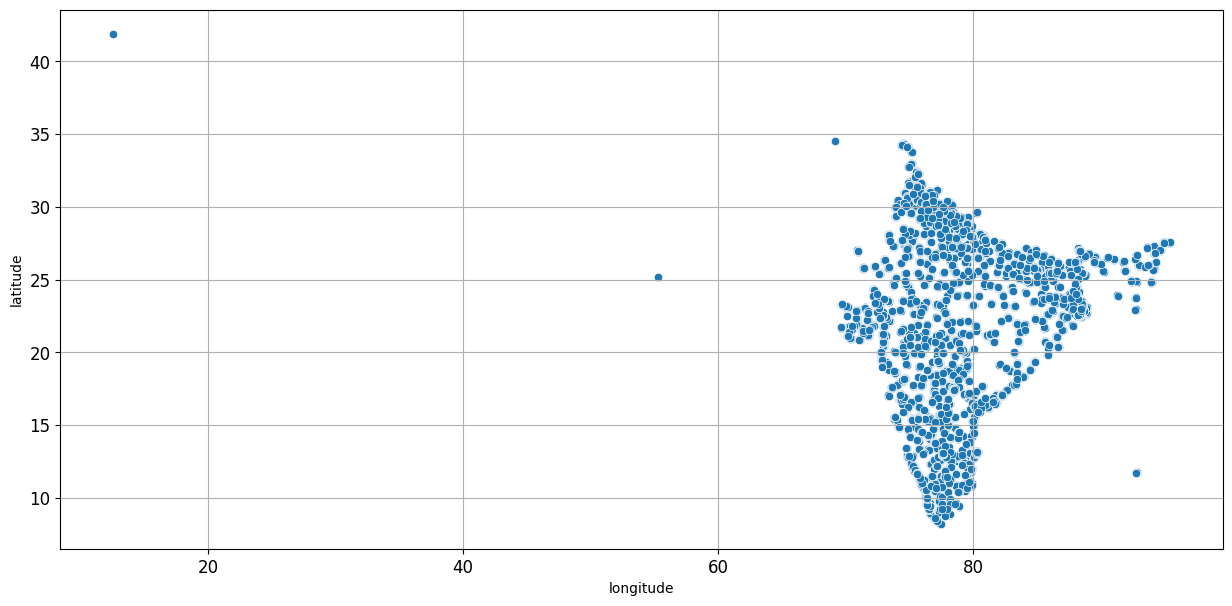

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

paper = plt.figure(figsize=(15,7))
sns.scatterplot(data= df_lat_long, y= 'latitude', x= 'longitude')
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid()
plt.show()

In [36]:
pip install geopandas


     ---------------------------------------- 1.1/1.1 MB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 22.7/22.7 MB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 4.8 MB/s eta 0:00:00


In [37]:
pip install Shapely

Note: you may need to restart the kernel to use updated packages.


C:\Users\Sapna\AppData\Local\Temp\ipykernel_4560\2604720913.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<AxesSubplot: >

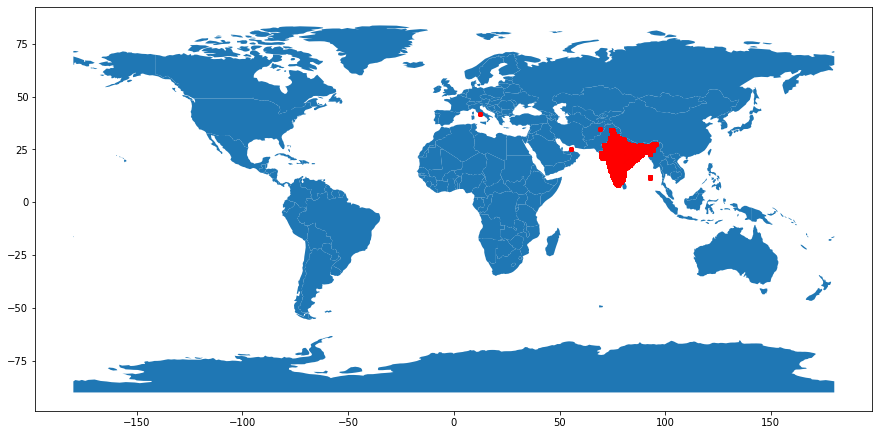

In [24]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df_lat_long['longitude'], df_lat_long['latitude'])]
gdf = GeoDataFrame(df_lat_long, geometry=geometry)

# This is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf.plot(ax=world.plot(figsize=(15,15)), marker='o', color='red', markersize=15)

In [27]:
import plotly.express as px

fig= px.scatter_geo(df_lat_long, lat='latitude', lon='longitude', hover_name='state')
fig.update_layout(title='Distribution of latitude and longitude', title_x=1)
fig.show()

In [31]:
indexNames=df[(df['longitude'] < 65)|((df['longitude']> 90)|(df['latitude']< 12))|((df['longitude']< 70)|(df['latitude']> 34))].index
df.drop(indexNames)

In [33]:
indexNames

Int64Index([     31,      37,      40,      58,      75,      87,      88,
                 89,     141,     157,
            ...
            3252613, 3252625, 3252643, 3252661, 3252680, 3252772, 3252778,
            3252822, 3252943, 3252949],
           dtype='int64', length=96138)

In [42]:
df[df['longitude'] < 60].nunique()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

In [45]:
df[(df['longitude']> 90)|(df['latitude']< 12)].nunique()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

In [43]:
df[(df['longitude']< 70)|(df['latitude']> 34)].nunique()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64